In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import matplotlib.image as img

from sklearn.metrics import classification_report
import cv2
from tensorflow import keras
from tensorflow.keras.layers import * 
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
import gc

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
label = []
file_path = []
training_path = "D:\\Dropbox\\Projects\\Full_Projects\\AlZheimer_Detection\\archive\\AugmentedAlzheimerDataset"
categories = os.listdir(training_path)
for category in categories:
    for file in os.listdir(os.path.join(training_path, category)):
        file_path.append(os.path.join(training_path, category, file))
        label.append(category)

In [8]:
final_data = pd.DataFrame(list(zip(file_path, label)), columns = ["file_path", "label"])

<AxesSubplot:ylabel='label'>

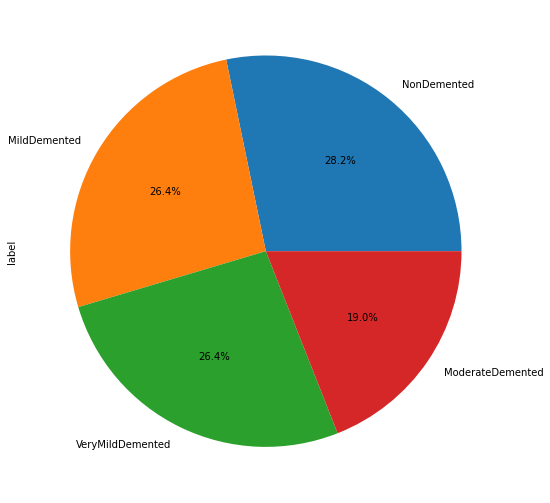

In [5]:
pie, ax = plt.subplots(figsize=[15,9])
(final_data["label"].value_counts()).plot.pie(autopct = "%.1f%%")

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
le.fit(final_data["label"])

LabelEncoder()

In [8]:
le.transform(final_data["label"])

array([0, 0, 0, ..., 3, 3, 3])

In [9]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [10]:
images = []
for i in final_data.iterrows():
    image = cv2.imread(i[1]["file_path"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150,150))
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    images.append(image)
images = np.array(images, dtype = "float32")

In [11]:
x_train, x_test, y_train, y_test = tts(images, label, test_size = 0.3) #Train test split
x_train, x_val, y_train, y_val = tts(x_train, y_train, test_size = 0.15) #Train validation Split

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [13]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [14]:
print("Training Data Shape is: ", str(x_train.shape), str(y_train.shape))
print("Validation Data Shape is: ", str(x_val.shape), str(y_val.shape))
print("Testing Data Shape is: ", str(x_test.shape), str(y_test.shape))

Training Data Shape is:  (20219, 150, 150, 3) (20219,)
Validation Data Shape is:  (3569, 150, 150, 3) (3569,)
Testing Data Shape is:  (10196, 150, 150, 3) (10196,)


In [15]:
base_model = resnet_v2.ResNet50V2(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
base_model.trainable = False ## Not trainable weights

In [16]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']    

 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 38, 38, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
          

 conv3_block2_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 19, 19, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
          

                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 10, 10, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 10, 10, 1024  4096       ['conv4_block3_out[0][0]']       
 ormalization)                  )                                                                 
          

                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 5, 5, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 5, 5, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv5_block2_out (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 5, 5, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 5, 5, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_blo

In [17]:
model = Sequential([
            base_model,
            Flatten(),
            Dense(4096, activation = "relu"),
            Dropout(0.5),
            Dense(2048, activation = "relu"),
            Dropout(0.5),
            Dense(4, activation = "softmax")
            ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4096)              209719296 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 8

In [19]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
              metrics = ["accuracy"])

In [20]:
history = model.fit(x_train,y_train, 
          validation_data = [x_val, y_val],
          batch_size = 2,
          epochs = 50,
          verbose = 2)

Epoch 1/50
10110/10110 - 676s - loss: 1.6588 - accuracy: 0.5197 - val_loss: 0.7255 - val_accuracy: 0.6753 - 676s/epoch - 67ms/step
Epoch 2/50


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/dense/MatMul/MatMul_1' defined at (most recent call last):
    File "C:\Users\User\anaconda3\envs\rnn\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\User\anaconda3\envs\rnn\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\anaconda3\envs\rnn\lib\asyncio\base_events.py", line 539, in run_forever
      self._run_once()
    File "C:\Users\User\anaconda3\envs\rnn\lib\asyncio\base_events.py", line 1775, in _run_once
      handle._run()
    File "C:\Users\User\anaconda3\envs\rnn\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp/ipykernel_29932/136062095.py", line 5, in <module>
      verbose = 2)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 538, in minimize
      loss, var_list=var_list, grad_loss=grad_loss, tape=tape)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\User\anaconda3\envs\rnn\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/dense/MatMul/MatMul_1'
OOM when allocating tensor with shape[51200,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/dense/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_9327]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("ResNet50V2_Alzheimer.h5")

In [ ]:
predictions = model.evaluate(x_test, y_test)

In [ ]:
gc.collect()
predictions = model.predict(x_test)
print(classification_report(y_test, np.round(np.argmax(predictions, axis = 1))))

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

FileNotFoundError: [Errno 2] No such file or directory: '[[...], [...], [...], [...]]'

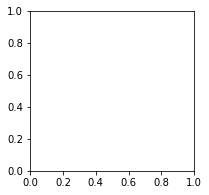

In [12]:

paths = []
for image in list(final_data["label"].unique()):
    path = random.choice(list(final_data["file_path"].loc[final_data["label"] == image]))
    paths.append(paths)

plt.figure(figsize=(10,10))

for i, img_path in enumerate(paths):
    if i >= 4:
        break

    img_path = str(img_path)
    # the number of images in the grid is 3*3 (9)
    plt.subplot(3,3,i+1)    
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(Path(img_path).name)
    plt.axis("off")

plt.show()
plt.close()

In [48]:
len(list(final_data["label"].unique()))

4